# Monte Carlo Simulation of European Option Pricing

This notebook provides functions for pricing European options and calculating their associated deltas throgh Monte Carlo simulations.

The functions available are:
- MC_euro_call(S, K, T, r, sigma, N): Estimates the price of a European call option.
- MC_euro_put(S, K, T, r, sigma, N): Estimates the price of a European put option.
- MC_euro_call_delta(S, K, T, r, sigma, N): Calculates the delta of a European call option
- MC_euro_put_delta(S, K, T, r, sigma, N): Calculates the delta of a European put option

The input parameters for these functions include:
- S: Spot price, 
- K: Strike price, 
- T: Time to expiry, 
- r: Risk-free interest rate, 
- sigma: volatility, 
- N: Number of Monte Carlo samples. 

The output comprises estimated prices or deltas along with their corresponding variances.

## 1. Libraries and Functions

In [1]:
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Scipy.stats
from scipy.stats import norm

# Random Generator
rng = np.random.default_rng(123)

### 1.1 Functions for Monte Carlo

In [2]:
def MC_call(S, K, T, r, sigma, N):
    
    # Initial Asset Pricie
    S0 = S
    
    # X follows a standard normal distribution
    X = rng.normal(0, 1, N)
    
    # The Distribution of asset prices at the Expiration of the Option
    ST = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    
    # The Discounted payoff of European call option at expiration
    fST = np.exp(-r*T) * np.maximum(ST-K, 0)
    
    # The option value by taking the expected discounted payoff
    price = np.mean(fST)
    variance = np.var(fST)
    
    return price, variance

def MC_put(S, K, T, r, sigma, N):
    
    # Initial Asset Pricie
    S0 = S

    # X follows a standard normal distribution
    X = rng.normal(0, 1, N)
    
    # The Distribution of asset prices at the Expiration of the Option
    ST = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    
    # The Discounted payoff of European call option at expiration
    fST = np.exp(-r*T) * np.maximum(K-ST, 0)

    # The option value by taking the expected discounted payoff
    price = np.mean(fST)
    variance = np.var(fST)
    
    return price, variance

def MC_call_delta(S, K, T, r, sigma, N):
    
    # Set numerical Parameter dS
    dS = 0.5

    # Compute N i.i.d random numbers X_i ~ N(0, 1)
    X = rng.normal(0, 1, N)
    
    # Compute ST_up for each X_i starting from S0 + dS
    S0 = S + dS
    ST_up = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    fST_up = np.exp(-r*T) * np.maximum(ST_up - K, 0)
    
    # Compute ST_dn for each X_i starting from S0 - dS
    S0 = S - dS
    ST_dn = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    fST_dn = np.exp(-r*T) * np.maximum(ST_dn - K, 0)
    
    # Compute dfST_dS_i
    dfST_dS = (fST_up - fST_dn) / (2*dS)
    
    # Compute the Mean and Variance
    delta = np.mean(dfST_dS)
    variance = np.var(dfST_dS)
    
    return delta, variance

def MC_put_delta(S, K, T, r, sigma, N):
    
    # Set numerical Parameter dS
    dS = 0.5

    # Compute N i.i.d random numbers X_i ~ N(0, 1)
    X = rng.normal(0, 1, N)
    
    # Compute ST_up for each X_i starting from S0 + dS
    S0 = S + dS
    ST_up = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    fST_up = np.exp(-r*T) * np.maximum(K-ST_up, 0)
    
    # Compute ST_dn for each X_i starting from S0 - dS
    S0 = S - dS
    ST_dn = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    fST_dn = np.exp(-r*T) * np.maximum(K-ST_dn, 0)
    
    # Compute dfST_dS_i
    dfST_dS = (fST_up - fST_dn) / (2*dS)
    
    # Compute the Mean and Variance
    delta = np.mean(dfST_dS)
    variance = np.var(dfST_dS)
    
    return delta, variance

### 1.2 Functions for Black Scholes

In [3]:
def BS_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def BS_put(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return -S * norm.cdf(-d1) + K * np.exp(-r*T) * norm.cdf(-d2)

def BS_price(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2 /2) * T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    BS_call = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    BS_put = BS_call - S + K * np.exp(-r*T)
    return BS_call, BS_put

---
## 2. Analysis of European Options

For the purpose of testing, I've chosen specific parameter values to analyse European options. The parameters selected for this analysis are as follows:
- $S = 140$
- $K = 110$
- $T = 1$
- $r = 0.05$
- $\sigma = 0.3$
- $N = 10,000$

In [4]:
# Parameters
S = 140
K = 110
T = 1
r = 0.05
sigma = 0.3
N = 10**4

### 2.1 European Option Pricing with Black-Scholes Model

Firstly, we will calculate the prices of call and put options using the Black-Scholes model. These values will serve as benchmarks for the estimates obtained through Monte Carlo simulations in this analysis.

In [5]:
BS_call, BS_put = BS_price(S, K, T, r, sigma)

print("BS Call Price: ", round(BS_call, 4))
print("BS Put Price: ", round(BS_put, 4))

BS Call Price:  38.541
BS Put Price:  3.1762


### 2.2 European Option Pricing with Monte Carlo

Monte Carlo simulation allows us to model the uncertainty associated with the underlying asset's price and derive a distribution of possible option prices.

In [6]:
# Calculate option prices using Monte Carlo
MC_call_price, var_call = MC_call(S, K, T, r, sigma, N)
MC_put_price, var_put = MC_put(S, K, T, r, sigma, N)

SEM_call = np.sqrt(var_call / N)
SEM_put = np.sqrt(var_put / N)

# Display the results
print("The Call option Price: ", round(MC_call_price, 4), "+/-", format(1.96*SEM_call, '.2g'))
print("The Put option Price: ", round(MC_put_price, 4), "+/-", format(1.96*SEM_put, '.2g'))

The Call option Price:  38.786 +/- 0.76
The Put option Price:  3.0945 +/- 0.16


The prices of the call and put options from the Black-Scholes formula are 38.541 and 3.1762, respectively. Through Monte Carlo simulation, we estimate these values as approximately 38.786 for the call option and 3.0945 for the put option. It's important to note that these are approximate values, influenced particularly by the number of samples used in the simulation.

### 2.3 Visualization of the Monte Carlo Pricing Process (Single Simulation)

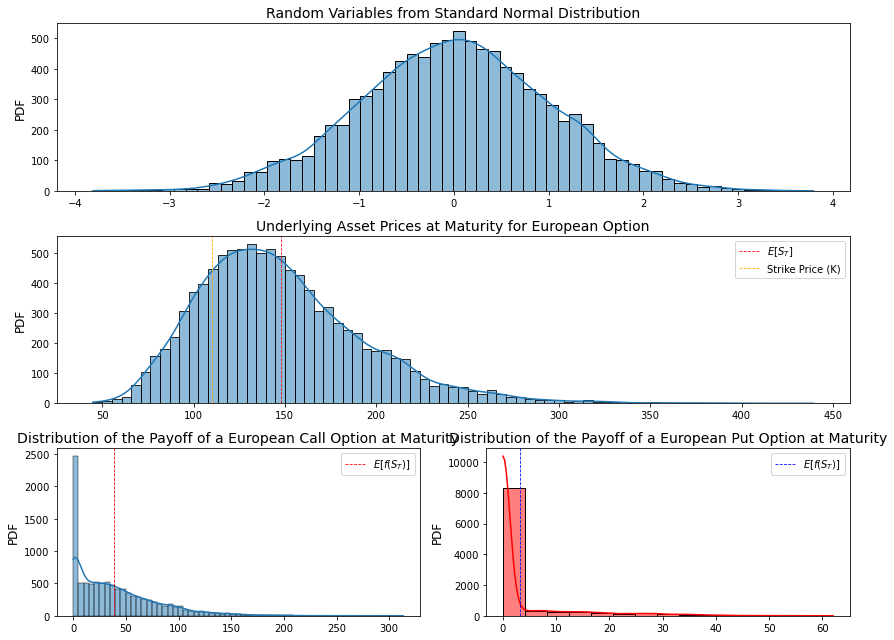

In [7]:
# Generate Random Numbers
X = rng.normal(0, 1, N)
# Calculate S_T
S_T = S * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
# Call option
fST_call = np.exp(-r*T) * np.maximum(S_T-K, 0)
# Put Option
fST_put = np.exp(-r*T) * np.maximum(K-S_T, 0)


# Plotting
fig = plt.figure(tight_layout=True, figsize=(12, 9))
gs = gridspec.GridSpec(3, 2)

# Plot 1: Random Variables from Standard normal Distribution
ax0 = plt.subplot(gs[0, :])
sns.histplot(X, kde=True, ax=ax0)
ax0.set_title("Random Variables from Standard Normal Distribution", fontsize=14)
ax0.set_ylabel('PDF', fontsize=12)

# plot 2: Underlying Asset Prices at Maturity for European Option 
ax1 = plt.subplot(gs[1, :])
sns.histplot(S_T, kde=True, ax=ax1)
ax1.set_title("Underlying Asset Prices at Maturity for European Option", fontsize=14)
ax1.axvline(np.mean(S_T), linestyle='dashed', color='red', label='$E[S_T]$', linewidth=0.8)
ax1.axvline(K, linestyle='dashed', color='orange', label='Strike Price (K)', linewidth=0.8)
ax1.legend()
ax1.set_ylabel('PDF', fontsize=12)

# plot 3: Distribution of the Payoff of a European Option at Maturity
ax20 = plt.subplot(gs[2, 0])
sns.histplot(fST_call, kde=True, ax=ax20)
ax20.set_title("Distribution of the Payoff of a European Call Option at Maturity", fontsize=14)
ax20.set_ylabel('PDF', fontsize=12)
ax20.axvline(np.mean(fST_call), linestyle='dashed', color='red', label='$E[f(S_T)]$', linewidth=0.8)
ax20.legend()

ax21 = plt.subplot(gs[2, 1])
sns.histplot(fST_put, kde=True, color='red', ax=ax21)
ax21.set_title("Distribution of the Payoff of a European Put Option at Maturity", fontsize=14)
ax21.set_ylabel('PDF', fontsize=12)
ax21.axvline(np.mean(fST_put), linestyle='dashed', color='blue', label='$E[f(S_T)]$', linewidth=0.8)
ax21.legend()

plt.show()

1. **Generate Random Numbers**: 
We begin by generating random numbers from a standard normal distribution. These are used to simulate the random component of asset price movements, consistent with the Geometric Brownian Motion (GBM) model.

2. **Calculate Asset Prices Using GBM**: 
These random numbers are then used within the Geometric Brownian Motion formula to simulate possible future paths of the underlying asset's price at the option's expiration time $T$.

3. **Discounted Payoff of European Options**:
Once we have simulated the asset prices at time $T$, we then calculate the payoff for the options. For a call option, the payoff is the maximum of zero or the asset price minus the strike price at expiration. These payoffs are then discounted to present value using the risk-free rate. These are used to estimate the expected payoff and its variance in just one simulation run.

### 2.4 Central Limit Theorem by Multiple Simulation

In [8]:
Nhist = 10**4 # Number of Historical Simulations
call_price_arr = np.zeros(Nhist)
put_price_arr = np.zeros(Nhist)

for i in range(Nhist):
    call_price_arr[i], _ = MC_call(S, K, T, r, sigma, N)
    put_price_arr[i], _ = MC_put(S, K, T, r, sigma, N)
    
call_mean = np.mean(call_price_arr)
call_SEM = np.sqrt(np.var(call_price_arr, ddof=1) / Nhist)

put_mean = np.mean(put_price_arr)
put_SEM = np.sqrt(np.var(put_price_arr, ddof=1) / Nhist)

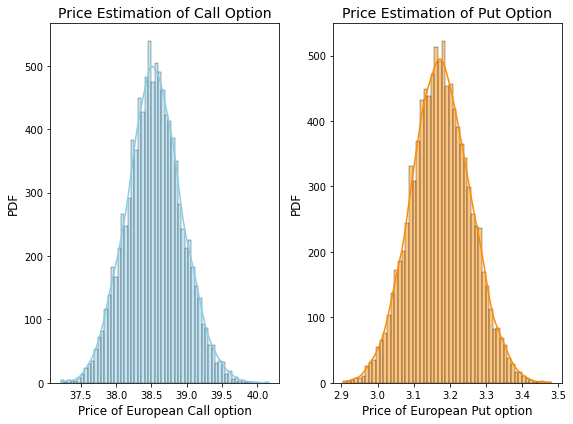

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

sns.histplot(call_price_arr, kde=True, ax=axes[0], color='skyblue')
axes[0].set_xlabel("Price of European Call option", fontsize=12)
axes[0].set_ylabel("PDF", fontsize=12)
axes[0].set_title("Price Estimation of Call Option", fontsize=14)

sns.histplot(put_price_arr, kde=True, color='darkorange', ax=axes[1])
axes[1].set_xlabel("Price of European Put option", fontsize=12)
axes[1].set_ylabel("PDF", fontsize=12)
axes[1].set_title("Price Estimation of Put Option", fontsize=14)

plt.tight_layout()
plt.show()

The histograms for the price estimation of European call and put options illustrate the practical application of the Central Limit Theorem (CLT). If we repeat the entire simulation many times, we are effectively generating many samples of the estimated option price and variance. This would provide us with a distribution of the estimated prices from which we can calculate an overall expected price and its variance, considering all simulation runs.

As the Monte Carlo simulation involves a large number of trials to forecast the option prices, the distribution of these prices tends to form a bell-shaped curve. This is in line with the CLT, which states that the distribution of the sample mean will approach a normal distribution as the sample size becomes larger. Consequently, the peak of the histograms indicates the most probable option price, which, as suggested by the CLT, will converge towards the true mean price with an increasing number of simulations. This convergence allows us to use the average of the simulated prices as a reliable estimate of the option's fair value.

### 2.5 Price Convergence and Error

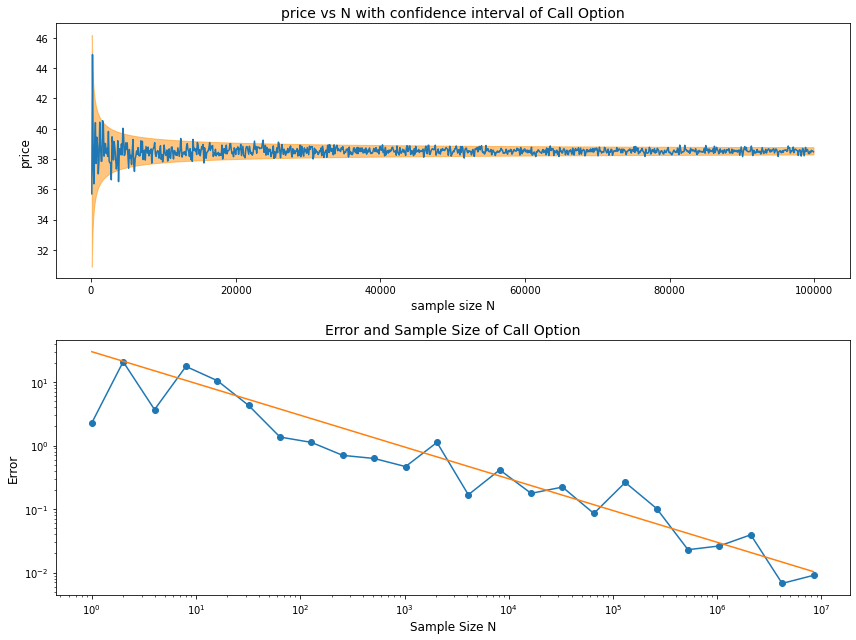

In [10]:
# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 9))

# Plot1 : Convergence of Monte Carlo
N_plot_0 = np.arange(100, 10**5, 100)
N_0 = len(N_plot_0)
price_plot_0 = np.zeros(N_0)

for k in range(N_0):
    price_plot_0[k], var = MC_call(S, K, T, r, sigma, N_plot_0[k])


sns.lineplot(y=price_plot_0, x=N_plot_0, ax=axes[0])
axes[0].fill_between(N_plot_0,
                    BS_call - 1.96 * np.sqrt(var/N_plot_0),
                    BS_call + 1.96 * np.sqrt(var/N_plot_0),
                    alpha = 0.5,
                    color = 'darkorange')
axes[0].set_xlabel("sample size N", fontsize=12)
axes[0].set_ylabel("price", fontsize=12)
axes[0].set_title("price vs N with confidence interval of Call Option", fontsize=14)


# Sample Numbers: 24 [1, 2, 4, ...]
N_1 = 24
N_plot_1 = 2**np.arange(N_1)
price_plot_1 = np.zeros(N_1)

for k in range(N_1):
    price_plot_1[k], _ = MC_call(S, K, T, r, sigma, N_plot_1[k])

error = np.abs(price_plot_1 - BS_call)

# Plot2 : Error (MC Price - BS Price) and Sample Size
axes[1].loglog(N_plot_1, error, '-o' )
axes[1].loglog(N_plot_1, 30 * N_plot_1**(-0.5))
axes[1].set_title("Error and Sample Size of Call Option", fontsize=14)
axes[1].set_xlabel("Sample Size N", fontsize=12)
axes[1].set_ylabel("Error", fontsize=12)

plt.tight_layout()
plt.show()

### 2.6 Option Value by Spot Price

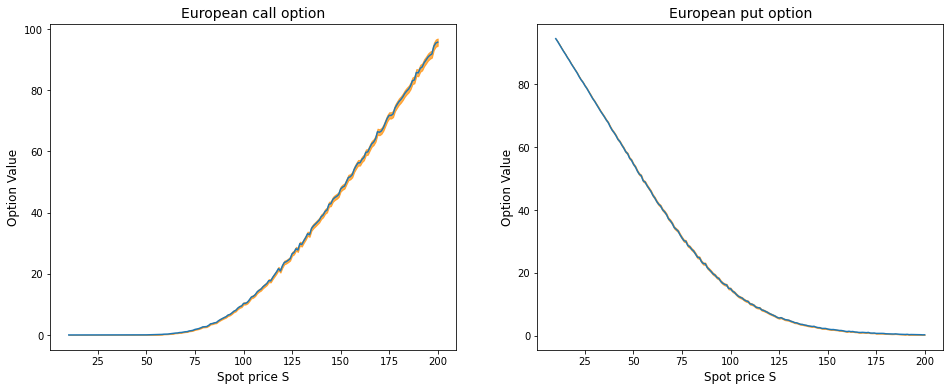

In [11]:
spot_price = np.arange(10, 201, 1)

N_spot = len(spot_price)
call_price_plot = np.zeros(N_spot)
call_var_plot = np.zeros(N_spot)
put_price_plot = np.zeros(N_spot)
put_var_plot = np.zeros(N_spot)
    
for i in range(N_spot):
    call_price_plot[i], call_var_plot[i] = MC_call(spot_price[i], K, T, r, sigma, N)
    put_price_plot[i], put_var_plot[i] = MC_put(spot_price[i], K, T, r, sigma, N)

SEM_call = np.sqrt(call_var_plot/N)
SEM_put = np.sqrt(put_var_plot/N)

option_labels = zip([call_price_plot, put_price_plot], ['European call option', 'European put option'], [SEM_call, SEM_put])

fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

for i, (price, option_type, SEM) in enumerate(option_labels):
    sns.lineplot(x=spot_price, y=price, ax=axes[i])
    axes[i].set_xlabel("Spot price S", fontsize=12)
    axes[i].set_ylabel("Option Value", fontsize=12)
    axes[i].set_title(option_type, fontsize=14)
    
    axes[i].fill_between(spot_price, price - 1.96*SEM, price + 1.96*SEM, 
                 alpha=0.7, color="darkorange")

plt.show()

### 2.7 Option Delta

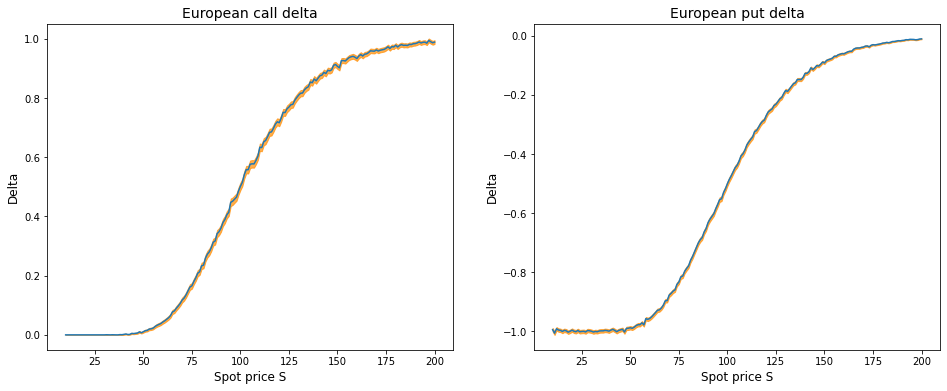

In [12]:
call_delta_plot = np.zeros(N_spot)
call_var_plot = np.zeros(N_spot)
put_delta_plot = np.zeros(N_spot)
put_var_plot = np.zeros(N_spot)

    
for i in range(N_spot):
    call_delta_plot[i], call_var_plot[i] = MC_call_delta(spot_price[i], K, T, r, sigma, N)
    put_delta_plot[i], put_var_plot[i] = MC_put_delta(spot_price[i], K, T, r, sigma, N)

SEM_call = np.sqrt(call_var_plot/N)
SEM_put = np.sqrt(put_var_plot/N)

option_labels = zip([call_delta_plot, put_delta_plot], ['European call delta', 'European put delta'], [SEM_call, SEM_put])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for i, (delta, option_type, SEM) in enumerate(option_labels):
    sns.lineplot(x=spot_price, y=delta, ax=axes[i])
    axes[i].set_xlabel("Spot price S", fontsize=12)
    axes[i].set_ylabel("Delta", fontsize=12)
    axes[i].set_title(option_type, fontsize=14)
    
    axes[i].fill_between(spot_price, delta - 1.96*SEM, delta + 1.96*SEM, 
                 alpha=0.7, color="darkorange")

plt.show()